In [2]:
# K Means Clustering
# Unsupervised Learning Algorithm to attempt to group similar clusters together in your data by proximity
# ex) market segmentation, customer groups, document groups, public vs private schools
# input: some unclassified data
# output: k clusters using k means algorithm, grouped based on similarity and patterns

"""
Algo:
1) Choose a number of clusters K
2) Randomly assign each point to a cluster
3) Until clusters top changing: for each cluster, 
    a) compute the cluster centroid by taking "mean vector" of points, 
    b) assign each data point to the "closest" centroid
    c) end when no more changes and re-assignment
    

Choosing a K value:
1) No easy answer for best k
2) Elbow Method: calc the "sum of squared error" for each value of k, 
                 SSE is the "sum of squared distance between each member of cluster and its centroid"
                 SSE gets smaller as k increases 
                 Elbow method means the SSE value decreases abruptly (change in SSE is high)
"""

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# make random samples
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=2, centers = 4, cluster_std=1.8, random_state=101)

# or pull it in
# df = pd.read_csv('College_Data', index_col=0) # if you want the first column to be index

In [4]:
# tuples
data[0].shape # first element is a a numpy array 

(200, 2)

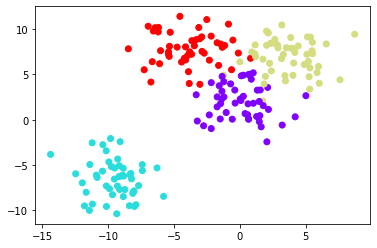

In [12]:
plt.scatter(data[0][:,0], # first column in numpy array
            data[0][:,1], # second column in numpy array
            c=data[1],    # optional data but we provide the "centers" mapping from above
            cmap='rainbow') # color map (default black and white)

In [7]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [23]:
# algorithm start
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4) # if you think there are 4 clusters
kmeans.fit(data[0])

kmeans2 = KMeans(n_clusters=8) # if you think there are 8 clusters
kmeans2.fit(data[0])

# kmeans.fit(df.drop('Target', axis=1)) # make sure no string columns and target column

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
# model output
kmeans.cluster_centers_ # center coordinates for the clusters, same number of dimensions as features

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664]])

In [25]:
# model output
kmeans.labels_ # predicted labels, normally do not have clusters

# normally where we stop because we will not have data on the true classes, but since we made the data, we do have it

array([2, 0, 3, 0, 0, 1, 0, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 1, 2, 1, 3,
       3, 1, 2, 1, 1, 3, 0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 0, 2, 3, 1, 3, 3, 2, 0, 3, 1, 2, 3, 3, 2, 0, 1, 0, 1, 2, 0, 3,
       1, 0, 0, 1, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 3, 1, 0, 1, 3, 3, 3, 2,
       3, 1, 1, 1, 1, 3, 3, 1, 0, 2, 1, 0, 3, 1, 3, 3, 0, 3, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 0, 2, 3, 1, 2, 2, 2,
       3, 1, 1, 2, 0, 2, 0, 3, 1, 0, 1, 2, 2, 0, 3, 1, 2, 2, 2, 2, 3, 0,
       3, 2, 0, 0, 0, 3, 0, 3, 3, 2, 1, 2, 3, 0, 2, 3, 0, 3, 2, 0, 3, 2,
       0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 0, 0, 2, 1, 3, 0, 0,
       1, 3])

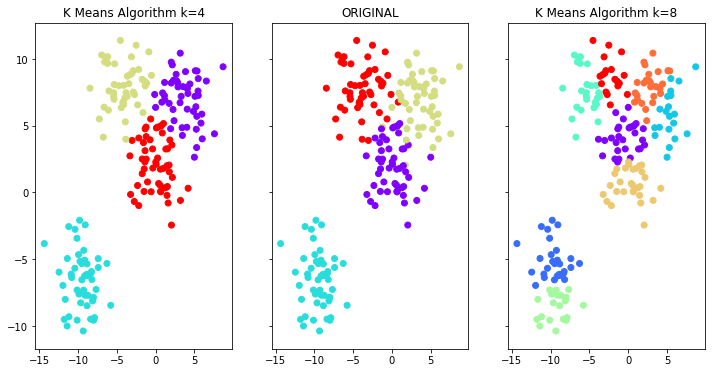

In [30]:
# map output accuracy: true vs model
fig , (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,6))

ax1.set_title('K Means Algorithm k=4')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title('ORIGINAL')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

ax3.set_title('K Means Algorithm k=8')
ax3.scatter(data[0][:,0],data[0][:,1],c=kmeans2.labels_,cmap='rainbow')

# can see that some of the more extreme points were mismapped but the algorithm just thought it belonged to the other ones